In [37]:
%matplotlib inline
from inc.notebook004 import *

# Predicting when data does not fit the memory

In [2]:
predict_memory()

Results for profiling set: 810 cases fit in the memory, 10 do not, 0 prediction errors.
Results for target set: 300 cases fit in the memory, 40 do not, 0 prediction errors.


# Data summary

In [3]:
get_summary()

mean (sec)  available  outliers  \
application set       input       workers                                    
hbkmeans    profiling 32000       1             18.97         10         0   
                                  2             17.72          8         2   
                                  3             17.32          8         2   
                                  4             18.88         10         0   
                                  5             19.90          9         1   
                                  6             20.97         10         0   
                                  7             21.90         10         0   
                                  8             23.26          9         1   
                      64000       1             19.08         10         0   
                                  2             18.60         10         0   
                                  3             17.92         10         0   
                                  4             19.13         10         0   
                                  5             20.41         10         0   
                                  6             21.32         10         0   
                                  7             21.78         10         0   
                                  8             22.56         10         0   
                      128000      1             20.51         10         0   
                                  2             19.37         10         0   
                                  3             18.60         10         0   
                                  4             19.71         10         0   
                                  5             21.00         10         0   
                                  6             21.29         10         0   
                                  7             22.50         10         0   
                                  8             22.42         10         0   
                      256000      1             22.83         10         0   
                                  2             21.02         10         0   
                                  3             19.50         10         0   
                                  4             20.57         10         0   
                                  5             21.58         10         0   
                                  6             22.76          8         2   
                                  7             23.64         10         0   
                                  8             24.39         10         0   
                      512000      1             27.80         10         0   
                                  2             24.19         10         0   
                                  3             21.51         10         0   
                                  4             22.68         10         0   
                                  5             23.90          9         1   
                                  6             24.85         10         0   
                                  7             25.54         10         0   
                                  8             25.99         10         0   
                      1024000     1             36.55         10         0   
                                  2             30.13         10         0   
                                  3             24.90         10         0   
                                  4             26.01         10         0   
                                  5             27.64          9         1   
                                  6             28.37         10         0   
                                  7             28.60         10         0   
                                  8             29.54          9         1   
                      2048000     1             52.56         10         0   
                                  2             40.73         10 

# Tasks and HDFS Blocks

In [4]:
tasks_blocks()

count
Application Size (MB) 1st-Stage Tasks HDFS Blocks       
hbkmeans    6.13      5               1               80
            12.26     5               1               80
            24.51     5               1               80
            49.03     5               1               80
            98.06     5               1               80
            196.11    5               2               80
            392.22    5               4               80
            784.45    10              7               80
            3137.82   25              25              50
            12551.30  100             99              50
hbsort      262.80    2               3               20
            525.60    5               5               30
            1051.18   9               9               40
            2102.38   17              17              30
            3132.80   25              25              50
            31327.82  245             245             40
wikipedia   128.00    2               1               10
            255.99    2               2               10
            511.95    4               4               10
            1024.00   8               8               30
            46294.09  362             362            150

# Stage Tasks

In [5]:
%%time
stage_tasks()

Wikipedia:


,,,count
stg 0,stg 1,stg 2,
2,200,1,20
4,200,1,10
8,200,1,30
362,200,1,150


HBKmeans:


,,,,,,,,,,,,,,,,,,,,,,,,,,count
stg 0,stg 1,stg 2,stg 3,stg 4,stg 5,stg 6,stg 7,stg 8,stg 9,stg 10,stg 11,stg 12,stg 13,stg 14,stg 15,stg 16,stg 17,stg 18,stg 19,stg 20,stg 21,stg 22,stg 23,stg 24,stg 25,
5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,5,2,5,2,5,2,5,2,5,2,5,560
10,10,10,10,10,10,10,10,10,10,10,10,10,10,2,10,2,10,2,10,2,10,2,10,2,10,80
25,25,25,25,25,25,25,25,25,25,25,25,25,25,2,25,2,25,2,25,2,25,2,25,2,25,50
100,100,100,100,100,100,100,100,100,100,100,100,100,100,2,100,2,100,2,100,2,100,2,100,2,100,50


HBSort:


count
stg 0 stg 1       
2     1         10
      2         10
5     1         10
      2         10
      4         10
9     1         10
      2         10
      4         10
      8         10
17    2         10
      4         10
      8         10
25    1         10
      2         10
      4         10
      8         10
      16        10
245   16        10
      32        10
      64        10
      128       10

CPU times: user 10.8 s, sys: 337 ms, total: 11.1 s
Wall time: 39.7 s


# Models

In [6]:
csv_file = Bundler.get_bundle('evaluation').filenames[0] + '.bz2'
eval_df = pd.read_csv(csv_file, index_col=['set', 'model', 'application']).sort_index()

In [7]:
eval_df.head(6)

MAPE   MPE     RMSE
set       model application                     
profiling 0     hbkmeans     0.25 -0.09  8708.88
                hbsort       0.43 -0.20 23171.88
                wikipedia    0.11 -0.02  3525.57
          1     hbkmeans     0.09 -0.02  3963.11
                hbsort       0.33 -0.14 20118.15
                wikipedia    0.11 -0.02  3069.46

## Comparison table


**Ranks**

In [22]:
%%time
add_ranks(eval_df)

CPU times: user 4.08 s, sys: 130 ms, total: 4.21 s
Wall time: 4.21 s


In [23]:
cmp_df = eval_df[['MAPE rank', 'RMSE rank', 'rank sum']].groupby(level=['set', 'model']).sum()

In [24]:
mape = eval_df['MAPE'].groupby(level=['set', 'model'])
rmse = eval_df['RMSE'].groupby(level=['set', 'model'])

**Mean**

In [25]:
cmp_df['MAPE mean'] = mape.mean()
cmp_df['RMSE mean'] = rmse.mean()

In [26]:
cmp_df['MAPE max'] = mape.max()
cmp_df['RMSE max'] = rmse.max()

**Max**

**Second max and max difference**

In [27]:
%%time
def max2(s):
    v = s.values
    v.sort()
    return v[1]

def max_diff(s):
    v = s.values
    diffs = np.abs([v[0] - v[1], v[0] - v[2], v[1] - v[2]])
    return max(diffs)

def assign2col(col):
    def assign_values(res):
        cmp_df[col] = res
    return assign_values

from multiprocessing import Pool
p = Pool()
p.apply_async(mape.aggregate, (max_diff,), callback=assign2col('MAPE homog'))
p.apply_async(rmse.aggregate, (max_diff,), callback=assign2col('RMSE homog'))
p.apply_async(mape.aggregate, (max2,), callback=assign2col('MAPE 2nd max'))
p.apply_async(rmse.aggregate, (max2,), callback=assign2col('RMSE 2nd max'))
p.close()
p.join()

CPU times: user 1.79 s, sys: 1.18 s, total: 2.97 s
Wall time: 5min 36s


In [28]:
%reset_selective -f mape
%reset_selective -f rmse

## Interesting models

In [29]:
def model_info(model):
    model = model if isinstance(model, Model) else get_model(model)
    print(model)
    n = model.number
    display(eval_df.xs(n, level='model', drop_level=False).swaplevel(0, 1))
    display(cmp_df.xs(n, level='model', drop_level=False).swaplevel(0, 1))
    return model

to_compare = []

#### Previous Model (old 553)

In [31]:
%%time
from sklearn.linear_model import RidgeCV

model = find_model(['1/workers * input', '(log(input))^2', '(log(workers))^2'], RidgeCV)
to_compare.append(model)

CPU times: user 7.18 s, sys: 6.67 ms, total: 7.19 s
Wall time: 7.19 s


#### Best by metric

In [32]:
most_common = select_best(cmp_df, model_info)
to_compare.extend(get_model(c[0]) for c in most_common)

Best in "MAPE rank": 950
Best in "RMSE rank": 950
Best in "rank sum": 950
Best in "MAPE mean": 601
Best in "RMSE mean": 3505
Best in "MAPE max": 3505
Best in "RMSE max": 262499
Best in "RMSE 2nd max": 679
Best in "MAPE 2nd max": 679
Best in "RMSE homog": 284473
Best in "MAPE homog": 375941


#### Comparison

In [33]:
print("Models' details:")
for model in to_compare:
    print('\n{}'.format(model))

Models' details:

      model number: 263096
      linear model: RidgeCV
      duration log: False
            params: alphas: (0.01, 0.1, 1, 3, 10)
number of features: 3
          features: (log(input))^2, (log(workers))^2, 1/workers * input

      model number: 950
      linear model: LinReg
      duration log: False
            params: 
number of features: 3
          features: (log(input))^2, (log(workers))^2, 1/workers * input

      model number: 3505
      linear model: LinReg
      duration log: False
            params: 
number of features: 4
          features: (1/workers)^2, 1/workers * input, log(input) * log(workers), log(workers)

      model number: 679
      linear model: LinReg
      duration log: False
            params: 
number of features: 3
          features: (log(workers))^2, 1/workers * input, log(input)

      model number: 262499
      linear model: RidgeCV
      duration log: False
            params: alphas: (0.01, 0.1, 1, 3, 10)
number of features: 3
     

In [34]:
print('Summary of all applications:')
for model in to_compare:
    display(cmp_df.xs(model.number, level='model', drop_level=False).swaplevel(0, 1))

Summary of all applications:


MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model  set                                                               
263096 profiling     481015    1051435   1532450       0.07    5180.59   
       target          5895      10674     16569       0.21   63152.61   

                  MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model  set                                                                     
263096 profiling      0.11  12520.28       1739.03          0.05    11237.81   
       target         0.44 171565.75      10802.50          0.12   164476.18   

                  MAPE homog  
model  set                    
263096 profiling        0.07  
       target           0.37

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
950   profiling     557936     970294   1528230       0.07    5175.86   
      target          2527       2768      5295       0.19   61806.75   

                 MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model set                                                                     
950   profiling      0.11  12516.25       1736.35          0.05    11241.27   
      target         0.45 173514.16       7215.48          0.08   168823.55   

                 MAPE homog  
model set                    
950   profiling        0.07  
      target           0.40

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
3505  profiling     556678    1160763   1717441       0.07    5309.15   
      target         11854      13989     25843       0.20   54986.35   

                 MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model set                                                                     
3505  profiling      0.12  13031.09       1572.19          0.05    11706.93   
      target         0.28 136380.97      19252.99          0.20   127055.89   

                 MAPE homog  
model set                    
3505  profiling        0.07  
      target           0.16

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
679   profiling     573630     973481   1547111       0.07    5183.75   
      target          2727       3082      5809       0.20   62845.20   

                 MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model set                                                                     
679   profiling      0.11  12484.36       1795.14          0.05    11212.62   
      target         0.47 177351.79       7125.34          0.07   173293.32   

                 MAPE homog  
model set                    
679   profiling        0.07  
      target           0.42

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model  set                                                               
262499 profiling     851468    1264929   2116397       0.08    5569.24   
       target         43151      34279     77430       0.58   75907.80   

                  MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model  set                                                                     
262499 profiling      0.12  13305.06       2069.98          0.06    11972.37   
       target         1.08 105158.20      92553.19          0.52    75146.19   

                  MAPE homog  
model  set                    
262499 profiling        0.08  
       target           0.94

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model  set                                                               
375941 profiling     441542     686047   1127589       0.07    4928.57   
       target        106390     100922    207312       1.69  275079.29   

                  MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model  set                                                                     
375941 profiling      0.12  12140.84       1392.09          0.04    10888.08   
       target         1.69 557606.09     151307.35          1.69   441281.67   

                  MAPE homog  
model  set                    
375941 profiling        0.08  
       target           0.01

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
601   profiling     569943     882248   1452191       0.07    5478.19   
      target          5305       7395     12700       0.19   55039.74   

                 MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model set                                                                     
601   profiling      0.13  13463.62       1722.82          0.05    12215.48   
      target         0.33 147368.54       8995.36          0.12   138613.24   

                 MAPE homog  
model set                    
601   profiling        0.09  
      target           0.22

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model  set                                                               
284473 profiling     568345    1130705   1699050       0.07    5194.35   
       target         70530      61264    131794       1.23  119769.76   

                  MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model  set                                                                     
284473 profiling      0.12  12734.37       1527.30          0.04    11413.00   
       target         2.00 120460.78     120116.06          1.43     1728.32   

                  MAPE homog  
model  set                    
284473 profiling        0.08  
       target           1.75

In [35]:
print('Metrics per application:')
for model in to_compare:
    display(eval_df.xs(model.number, level='model', drop_level=False).swaplevel(0, 1))

Metrics per application:


MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model  set       application                                               
263096 profiling hbkmeans     0.05 -0.00   1739.03     343639     307569   
                 hbsort       0.11 -0.04  12520.28      31245     414171   
                 wikipedia    0.04 -0.00   1282.47     106131     329695   
       target    hbkmeans     0.07 -0.01   7089.57         17         74   
                 hbsort       0.44  0.44 171565.75       1837       1754   
                 wikipedia    0.12  0.12  10802.50       4041       8846   

                              rank sum  
model  set       application            
263096 profiling hbkmeans       651208  
                 hbsort         445416  
                 wikipedia      435826  
       target    hbkmeans           91  
                 hbsort           3591  
                 wikipedia       12887

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model set       application                                               
950   profiling hbkmeans     0.05 -0.00   1736.35     342965     307368   
                hbsort       0.11 -0.04  12516.25      31764     413915   
                wikipedia    0.04 -0.00   1274.98     183207     249011   
      target    hbkmeans     0.08 -0.02   7215.48         55         92   
                hbsort       0.45  0.45 173514.16       2007       1874   
                wikipedia    0.05  0.04   4690.61        465        802   

                             rank sum  
model set       application            
950   profiling hbkmeans       650333  
                hbsort         445679  
                wikipedia      432218  
      target    hbkmeans          147  
                hbsort           3881  
                wikipedia        1267

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model set       application                                               
3505  profiling hbkmeans     0.05 -0.00   1572.19     294930     291955   
                hbsort       0.12 -0.05  13031.09      55292     450029   
                wikipedia    0.04 -0.00   1324.16     206456     418779   
      target    hbkmeans     0.13 -0.09   9325.08       1200        938   
                hbsort       0.28  0.27 136380.97        288        434   
                wikipedia    0.20  0.20  19252.99      10366      12617   

                             rank sum  
model set       application            
3505  profiling hbkmeans       586885  
                hbsort         505321  
                wikipedia      625235  
      target    hbkmeans         2138  
                hbsort            722  
                wikipedia       22983

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model set       application                                               
679   profiling hbkmeans     0.05 -0.00   1795.14     358954     315021   
                hbsort       0.11 -0.04  12484.36      37257     411653   
                wikipedia    0.04 -0.00   1271.74     177419     246807   
      target    hbkmeans     0.07 -0.01   7125.34         15         77   
                hbsort       0.47  0.46 177351.79       2336       2399   
                wikipedia    0.05  0.03   4058.47        376        606   

                             rank sum  
model set       application            
679   profiling hbkmeans       673975  
                hbsort         448910  
                wikipedia      424226  
      target    hbkmeans           92  
                hbsort           4735  
                wikipedia         982

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model  set       application                                               
262499 profiling hbkmeans     0.06 -0.01   2069.98     415664     380592   
                 hbsort       0.12 -0.05  13305.06      67779     451504   
                 wikipedia    0.04 -0.00   1332.69     368025     432833   
       target    hbkmeans     1.08 -1.08  92553.19      23609      19511   
                 hbsort       0.14  0.09 105158.20         13         36   
                 wikipedia    0.52 -0.52  30012.01      19529      14732   

                              rank sum  
model  set       application            
262499 profiling hbkmeans       796256  
                 hbsort         519283  
                 wikipedia      800858  
       target    hbkmeans        43120  
                 hbsort             49  
                 wikipedia       34261

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model  set       application                                               
375941 profiling hbkmeans     0.04 -0.00   1392.09     241474     248417   
                 hbsort       0.12 -0.04  12140.84      74387     298259   
                 wikipedia    0.04 -0.00   1252.76     125681     139371   
       target    hbkmeans     1.69 -1.69 151307.35      43176      38437   
                 hbsort       1.69  1.69 557606.09      29999      29937   
                 wikipedia    1.69 -1.69 116324.42      33215      32548   

                              rank sum  
model  set       application            
375941 profiling hbkmeans       489891  
                 hbsort         372646  
                 wikipedia      265052  
       target    hbkmeans        81613  
                 hbsort          59936  
                 wikipedia       65763

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model set       application                                               
601   profiling hbkmeans     0.05 -0.00   1722.82     341984     306428   
                hbsort       0.13 -0.05  13463.62     136399     452009   
                wikipedia    0.04 -0.00   1248.14      91560     123811   
      target    hbkmeans     0.11 -0.06   8755.30        770        714   
                hbsort       0.33  0.30 147368.54        444        600   
                wikipedia    0.12  0.08   8995.36       4091       6081   

                             rank sum  
model set       application            
601   profiling hbkmeans       648412  
                hbsort         588408  
                wikipedia      215371  
      target    hbkmeans         1484  
                hbsort           1044  
                wikipedia       10172

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model  set       application                                               
284473 profiling hbkmeans     0.04 -0.00   1527.30     273371     284812   
                 hbsort       0.12 -0.05  12734.37      57921     436739   
                 wikipedia    0.04 -0.00   1321.37     237053     409154   
       target    hbkmeans     1.43 -1.43 120460.78      33957      28075   
                 hbsort       0.25  0.25 120116.06        206        190   
                 wikipedia    2.00 -2.00 118732.45      36367      32999   

                              rank sum  
model  set       application            
284473 profiling hbkmeans       558183  
                 hbsort         494660  
                 wikipedia      646207  
       target    hbkmeans        62032  
                 hbsort            396  
                 wikipedia       69366

**Model number 263096**

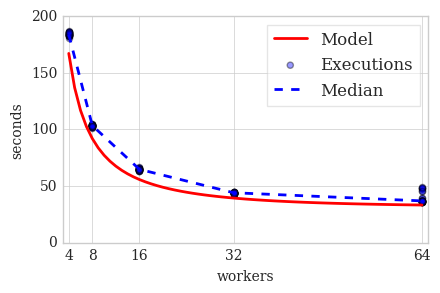

Prediction of the Wikipedia application target execution duration.


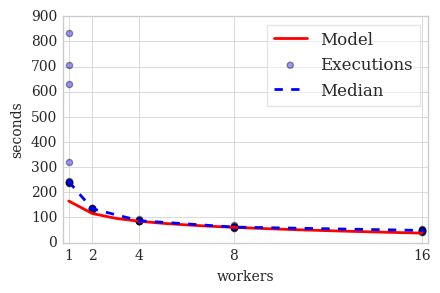

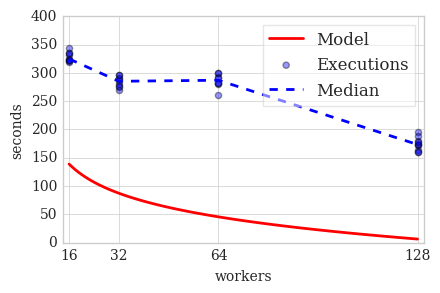

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


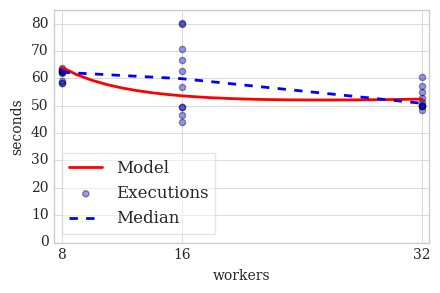

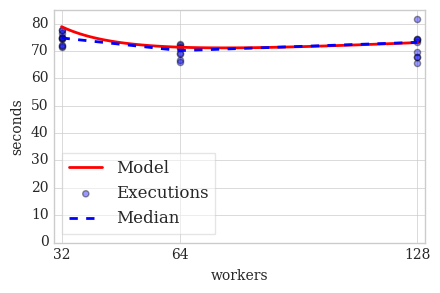

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 950**

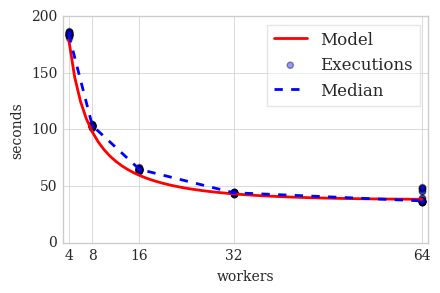

Prediction of the Wikipedia application target execution duration.


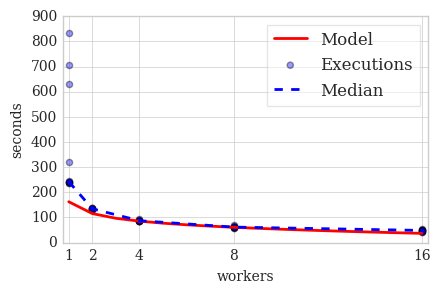

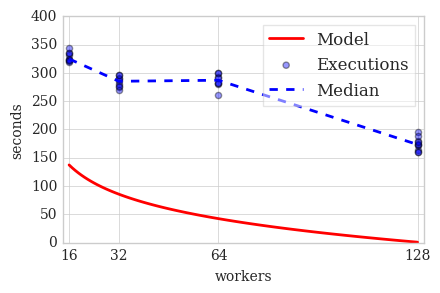

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


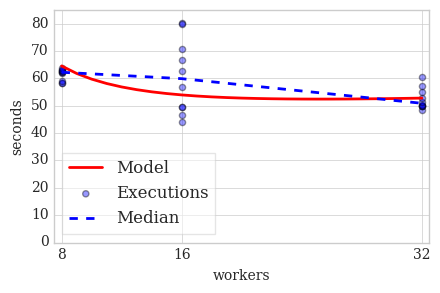

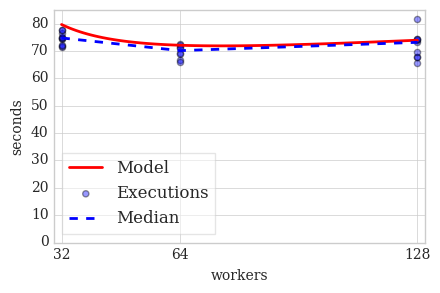

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 3505**

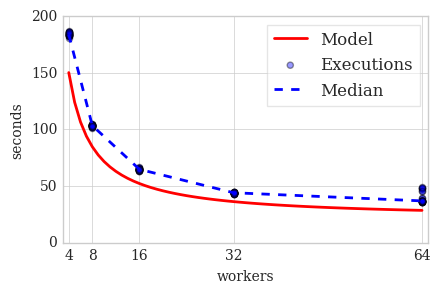

Prediction of the Wikipedia application target execution duration.


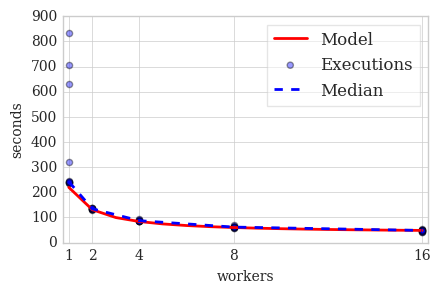

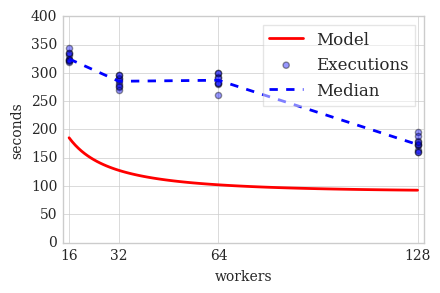

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


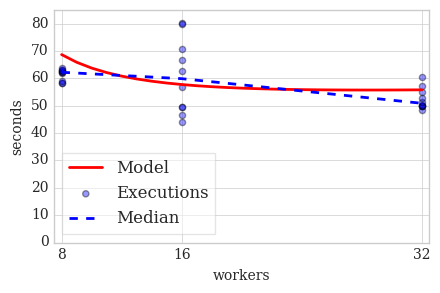

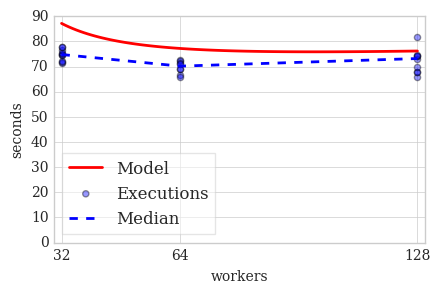

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 679**

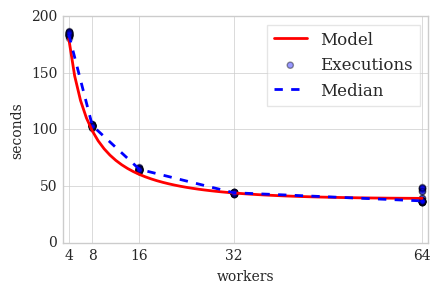

Prediction of the Wikipedia application target execution duration.


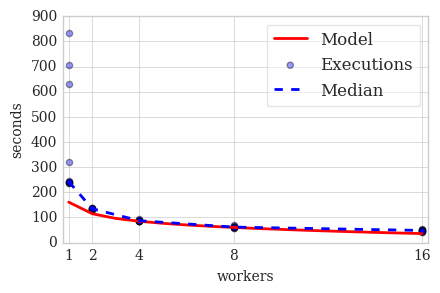

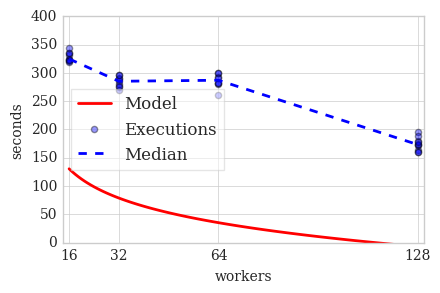

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


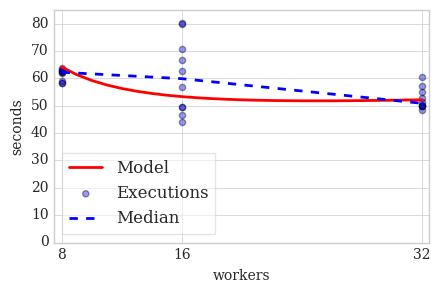

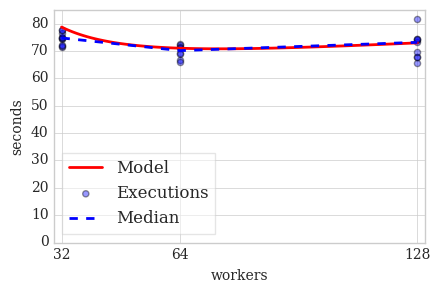

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 262499**

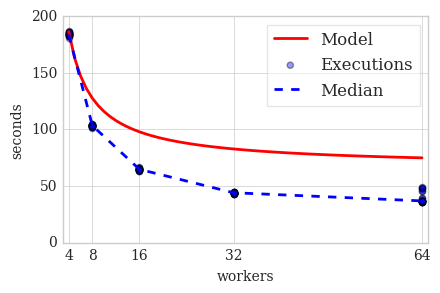

Prediction of the Wikipedia application target execution duration.


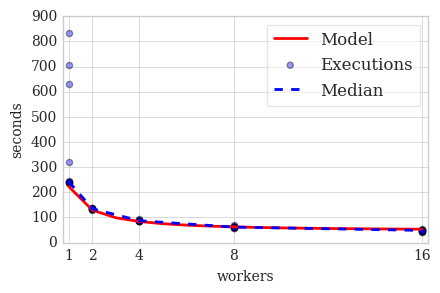

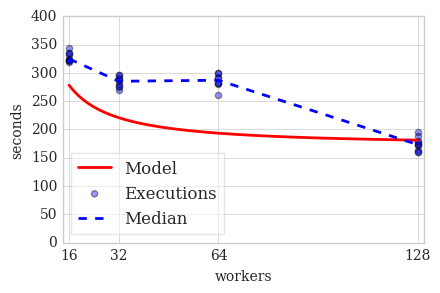

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


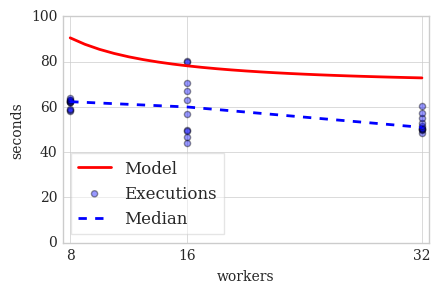

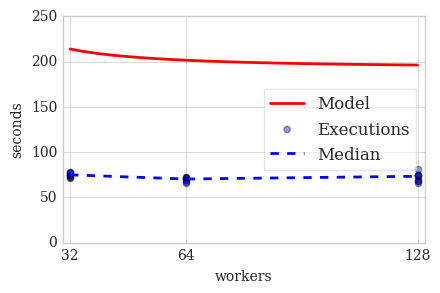

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 375941**

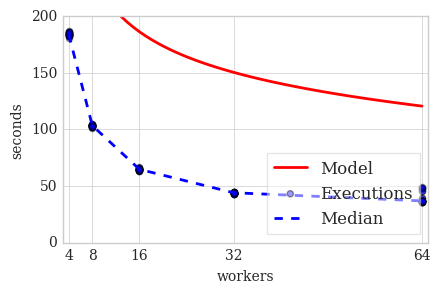

Prediction of the Wikipedia application target execution duration.


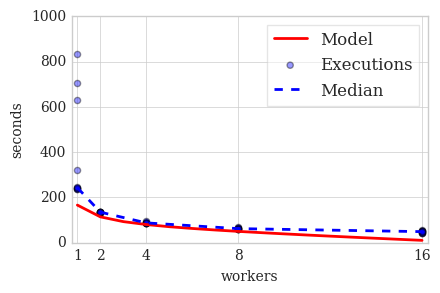

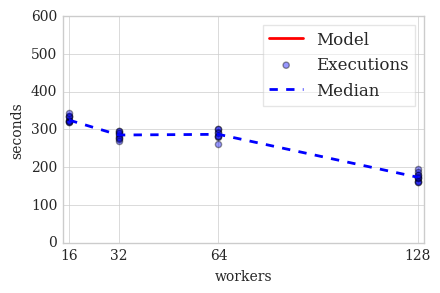

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


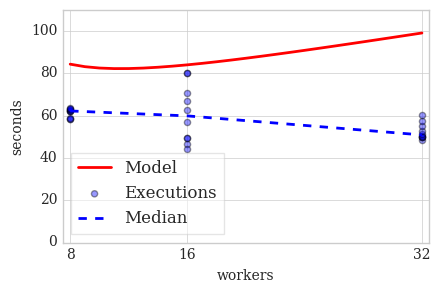

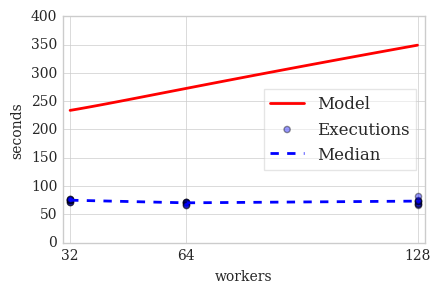

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 601**

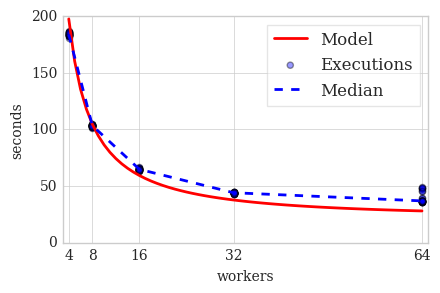

Prediction of the Wikipedia application target execution duration.


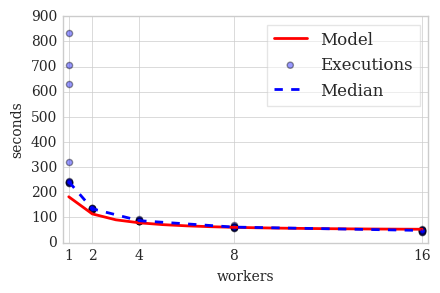

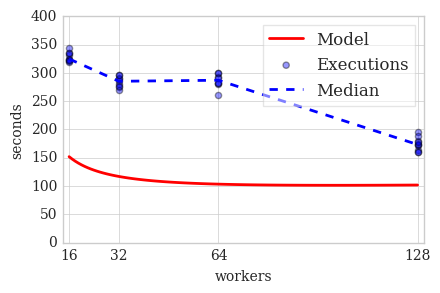

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


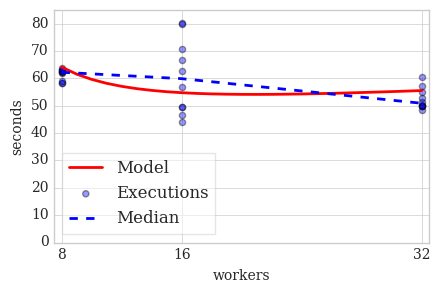

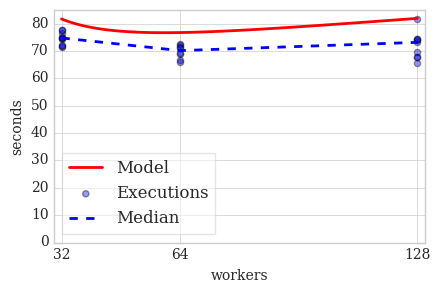

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 284473**

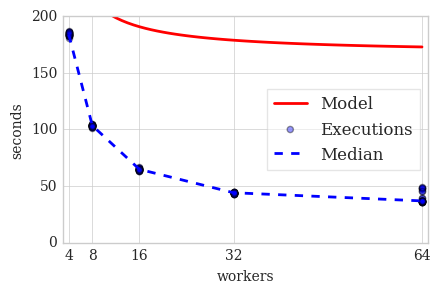

Prediction of the Wikipedia application target execution duration.


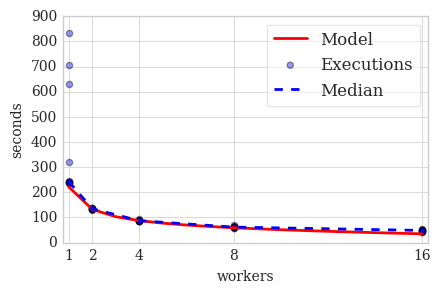

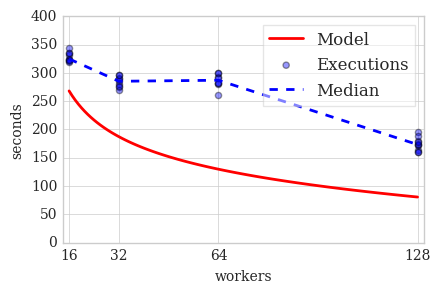

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


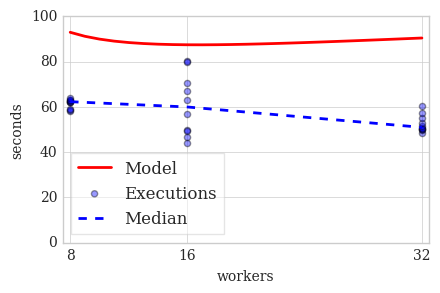

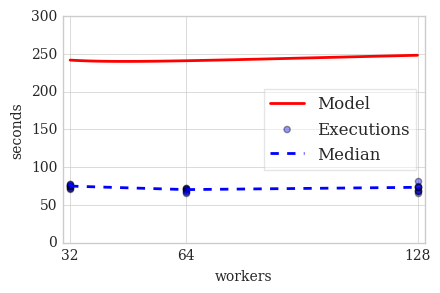

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


In [39]:
for model in to_compare:
    display(Markdown('**Model number {}**'.format(model.number)))
    plot_model(model)

## Profiling best

In [41]:
select_best(cmp_df, model_info, 'profiling')

Best in "MAPE rank": 253139
Best in "RMSE rank": 181966
Best in "rank sum": 258165
Best in "MAPE mean": 256828
Best in "RMSE mean": 262057
Best in "MAPE max": 140239
Best in "RMSE max": 236505
Best in "RMSE 2nd max": 166913
Best in "MAPE 2nd max": 149823
Best in "RMSE homog": 206122
Best in "MAPE homog": 1212


[(166913, 1),
 (253139, 1),
 (258165, 1),
 (1212, 1),
 (236505, 1),
 (262057, 1),
 (206122, 1),
 (149823, 1),
 (256828, 1),
 (181966, 1),
 (140239, 1)]

In [42]:
model_info(183678);

      model number: 183678
      linear model: LinReg
      duration log: False
            params: 
number of features: 10
          features: (1/workers)^2, 1/workers, 1/workers * log(input), input, input * log(workers), input * workers, log(input), log(input) * log(workers), log(input) * workers, log(workers)


MAPE     MPE        RMSE  MAPE rank  RMSE rank  \
model  set       application                                                    
183678 profiling hbkmeans      0.04   -0.00     1231.87      83119      82690   
                 hbsort        0.07   -0.02     9194.01       6131       6128   
                 wikipedia     0.04   -0.00     1245.38     152744     102864   
       target    hbkmeans     46.25  -46.25  5552813.59     477522     477423   
                 hbsort      162.33 -144.00 56516627.34     494038     491107   
                 wikipedia   533.41 -533.41 33032012.38     457619     457807   

                              rank sum  
model  set       application            
183678 profiling hbkmeans       165809  
                 hbsort          12259  
                 wikipedia      255608  
       target    hbkmeans       954945  
                 hbsort         985145  
                 wikipedia      915426

MAPE rank  RMSE rank  rank sum  MAPE mean   RMSE mean  \
model  set                                                                
183678 profiling     241994     191682    433676       0.05     3890.42   
       target       1429179    1426337   2855516     247.33 31700484.44   

                  MAPE max    RMSE max  RMSE 2nd max  MAPE 2nd max  \
model  set                                                           
183678 profiling      0.07     9194.01       1245.38          0.04   
       target       533.41 56516627.34   33032012.38        162.33   

                  RMSE homog  MAPE homog  
model  set                                
183678 profiling     7962.15        0.03  
       target    50963813.75      487.17

## Log models

In [43]:
log_models = [m for m in get_model_creator().get_models(0, 1) if m.is_log]

In [44]:
model_nrs = [m.number for m in log_models]
cmp_df.loc[cmp_df.index.get_level_values('model').isin(model_nrs)].sort_values('rank sum')

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
set       model                                                          
target    262143      18283      26619     44902       0.32   78794.82   
          524289      19931      27606     47537       0.33   79500.71   
          262145      23164      25318     48482       0.35   76752.57   
          524291      23320      25843     49163       0.35   77484.26   
          262144      37524      38435     75959       0.65  113274.72   
          524290      37626      38504     76130       0.65  113303.61   
profiling 262145    1007175    1447086   2454261       0.09    6398.24   
          524291    1007842    1455806   2463648       0.09    6415.70   
          262143    1528384    1548861   3077245       0.16    9097.79   
          524289    1528354    1549130   3077484       0.16    9111.23   
          524290    1572191    1572866   3145057       0.24   12081.08   
          262144    1572193    1572865   3145058       0.24   12077.07   

                  MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
set       model                                                                
target    262143      0.42 149755.11      73217.32          0.38   136343.09   
          524289      0.44 150451.31      74294.33          0.38   136694.81   
          262145      0.55 144016.03      72306.69          0.31   130081.06   
          524291      0.55 145629.72      72563.36          0.32   131370.02   
          262144      0.70 214706.48      85257.89          0.67   174846.69   
          524290      0.70 214346.86      85094.22          0.67   173877.12   
profiling 262145      0.10  13066.85       4382.61          0.10    11321.60   
          524291      0.10  13086.83       4404.02          0.10    11330.56   
          262143      0.28  19816.36       4406.39          0.11    16745.74   
          524289      0.28  19824.85       4426.57          0.11    16742.58   
          524290      0.37  23899.29       8787.87          0.23    20343.23   
          262144      0.37  23882.27       8796.00          0.23    20329.34   

                  MAPE homog  
set       model               
target    262143        0.25  
          524289        0.27  
          262145        0.37  
          524291        0.37  
          262144        0.12  
          524290        0.10  
profiling 262145        0.04  
          524291        0.04  
          262143        0.18  
          524289        0.18  
          524290        0.26  
          262144        0.26

      model number: 262145
      linear model: LinReg
      duration log: True
            params: 
number of features: 2
          features: log(input), log(workers)


MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model  set       application                                               
262145 profiling hbkmeans     0.10 -0.01   4382.61     508210     518730   
                 hbsort       0.10 -0.02  13066.85      20969     450323   
                 wikipedia    0.06 -0.00   1745.25     477996     478033   
       target    hbkmeans     0.18  0.18  13934.97       2600       2548   
                 hbsort       0.31  0.29 144016.03        354        534   
                 wikipedia    0.55  0.55  72306.69      20210      22236   

                              rank sum  
model  set       application            
262145 profiling hbkmeans      1026940  
                 hbsort         471292  
                 wikipedia      956029  
       target    hbkmeans         5148  
                 hbsort            888  
                 wikipedia       42446

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model  set                                                               
262145 profiling    1007175    1447086   2454261       0.09    6398.24   
       target         23164      25318     48482       0.35   76752.57   

                  MAPE max  RMSE max  RMSE 2nd max  MAPE 2nd max  RMSE homog  \
model  set                                                                     
262145 profiling      0.10  13066.85       4382.61          0.10    11321.60   
       target         0.55 144016.03      72306.69          0.31   130081.06   

                  MAPE homog  
model  set                    
262145 profiling        0.04  
       target           0.37

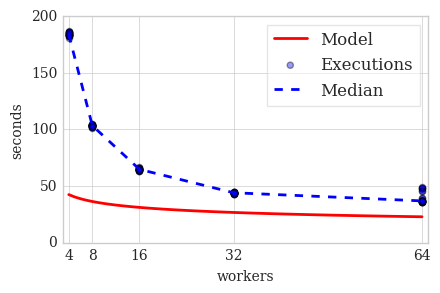

Prediction of the Wikipedia application target execution duration.


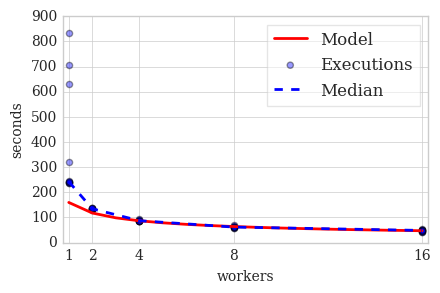

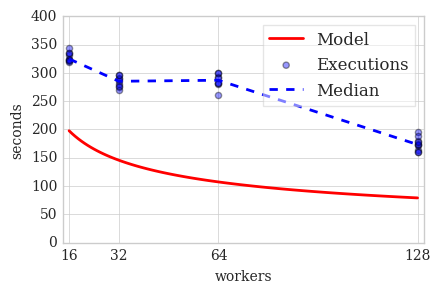

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


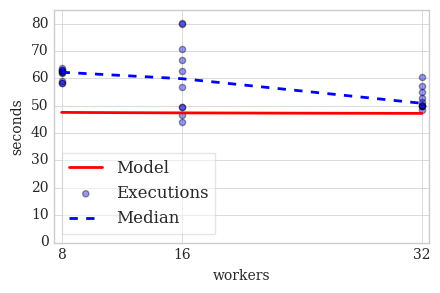

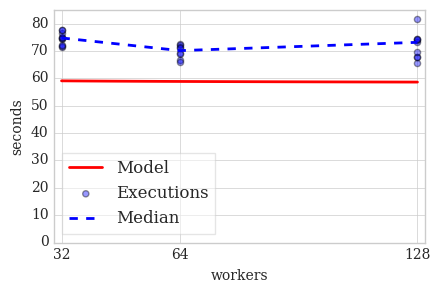

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


In [45]:
model = model_info(262145)
plot_model(model)